# Modeling
The notebook includes modeling part of car price prediction project.
## Load packages

In [1]:
import pandas as pd 
from functions import remove_space, encoding, evaluation
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from model import model
seed=123

## Modeling - preparation
Features chosen to modeling:
1. Age
2. KM's driven
3. make_new_1 
4. make_new_2 
5. Assembly
6. registration_city
7. Transmission
8. Car features - these variable is already encoded to 0/1 variables.

is_petrol was removed because of low share one of the category.
### Features encoding
Encoding of categorical features for variables with only two possible value will be made as one hot encoding while the others (make and registration city) will be made as label encoder sorted by average price which helps decision tree based algorithm to produce smaller trees with the same accuracy.

In [2]:
data= pd.read_csv('olx_cars_adjusted.csv')

In [3]:
data = remove_space(data)

In [4]:
cols_to_one_hot = [ 'Assembly', 'Transmission']
cols_to_one_hot_enc = ['Assembly_Local','Transmission_Manual']
cols_to_avg = ['make_new_1', 'make_new_2', 'registration_city']
cols_avg_enc = [i + "_encoded" for i in cols_to_avg ]
numerical_features_x =["KM's_driven", 'Age']
all_features = ['USB_and_Auxillary_Cable',
 'AM/FM_Radio',
 'Heated_Seats',
 'ABS',
 'Power_Steering',
 'Rear_Camera',
 'Climate_Control',
 'Power_Windows',
 'DVD_Player',
 'Cool_Box',
 'Keyless_Entry',
 'Air_Conditioning',
 'Rear_Seat_Entertainment',
 'Immobilizer_Key',
 'Power_Locks',
 'Sun_Roof',
 'Cruise_Control',
 'Air_Bags',
 'Front_Speakers',
 'CD_Player',
 'Power_Mirrors',
 'Rear_speakers',
 'Steering_Switches',
 'Front_Camera',
 'Rear_AC_Vents',
 'Cassette_Player',
 'Navigation_System',
 'Alloy_Rims']

In [5]:
data = encoding(data,cols_to_one_hot, cols_to_avg,'Price')

## Modeling
### Model on all variables

In [6]:
train_X, test_X, train_y, test_y = train_test_split(data,data['Price'], test_size=0.3, random_state=seed)

In [7]:
final_models_feature = []
final_models_feature.extend(numerical_features_x)
final_models_feature.extend(cols_avg_enc)
final_models_feature.extend(all_features)
final_models_feature.extend(cols_to_one_hot_enc)

In [8]:
categorical_features = []
categorical_features.extend(cols_avg_enc)
categorical_features.extend(all_features)
categorical_features.extend(cols_to_one_hot_enc)

In [9]:
pip show lightgbm

Name: lightgbm
Version: 4.2.0
Summary: LightGBM Python Package
Home-page: https://github.com/microsoft/LightGBM
Author: 
Author-email: 
License: The MIT License (MIT)

Copyright (c) Microsoft Corporation

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS O

In [ ]:
model_1 = model(numerical_features=numerical_features_x, cat_features=categorical_features, train_X=train_X,
                train_y=train_y,seed=seed,fold_no=3,obj='rmse')
model_1.train(n_trials=20)

### Evaluation

In [11]:
pred_train = model_1.predict(train_X,y_name='Price')
pred_test = model_1.predict(test_X,y_name='Price')

In [12]:
model_1.importance_calculation()
model_1.importance

Age                          3054.0
KM's_driven                  2944.0
Transmission_Manual           925.0
make_new_1_encoded            828.0
registration_city_encoded     330.0
Air_Conditioning              322.0
Power_Mirrors                 306.0
Power_Windows                 281.0
Alloy_Rims                    277.0
Power_Steering                251.0
Air_Bags                      215.0
ABS                           213.0
Cruise_Control                179.0
Power_Locks                   161.0
Climate_Control               126.0
Front_Speakers                105.0
Rear_Camera                    96.0
CD_Player                      93.0
Assembly_Local                 92.0
Sun_Roof                       83.0
Rear_AC_Vents                  76.0
Immobilizer_Key                68.0
Navigation_System              58.0
Steering_Switches              56.0
Rear_speakers                  50.0
AM/FM_Radio                    44.0
Keyless_Entry                  36.0
DVD_Player                  

  dataset        r2            mae      mape           rmse
0   train  0.955616  176123.475512  0.103759  245054.016432
1    test  0.914922  225175.720265  0.136607  333223.171664


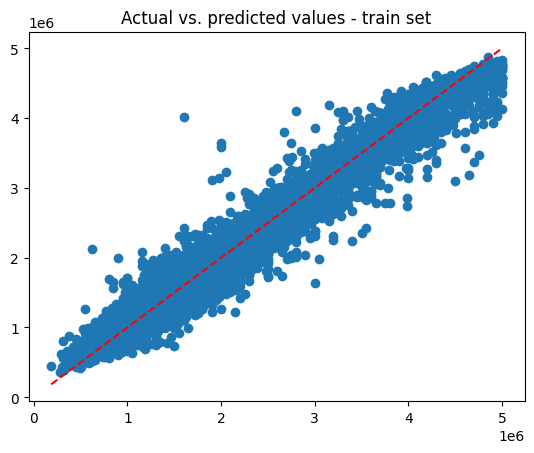

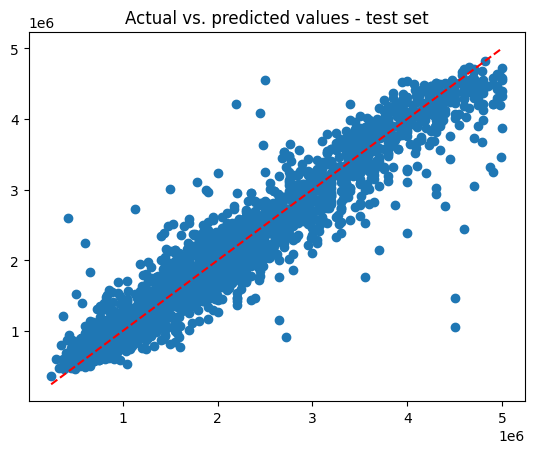

In [13]:
evaluation(pred_train=pred_train['prediction'], 
           train_y = pred_train['y_true'], 
           pred_test = pred_test['prediction'], 
           test_y = pred_test['y_true'])

Model has good quality and it is not overfitted 

### Model with the highest importance features

In [31]:
model_1.importance[0:18]

Age                          3054.0
KM's_driven                  2944.0
Transmission_Manual           925.0
make_new_1_encoded            828.0
registration_city_encoded     330.0
Air_Conditioning              322.0
Power_Mirrors                 306.0
Power_Windows                 281.0
Alloy_Rims                    277.0
Power_Steering                251.0
Air_Bags                      215.0
ABS                           213.0
Cruise_Control                179.0
Power_Locks                   161.0
Climate_Control               126.0
Front_Speakers                105.0
Rear_Camera                    96.0
CD_Player                      93.0
Name: importance, dtype: float64

In [32]:
## filtered features
filtered_features = list(model_1.importance[0:18].index.values)

In [33]:
cat_features_filtered = [i for i in filtered_features if i not in ['Age',"KM's_driven"]]

### Evaluation

In [ ]:
model_2 = model(numerical_features=numerical_features_x, cat_features=cat_features_filtered, train_X=train_X,
                train_y=train_y,seed=seed,fold_no=3,obj='rmse')
model_2.train(n_trials=100)

In [36]:
pred_train = model_2.predict(train_X,y_name='Price')
pred_test = model_2.predict(test_X,y_name='Price')

  dataset        r2            mae      mape           rmse
0   train  0.949133  190142.100868  0.114549  262341.062238
1    test   0.91326   227621.41318  0.138233   336462.40337


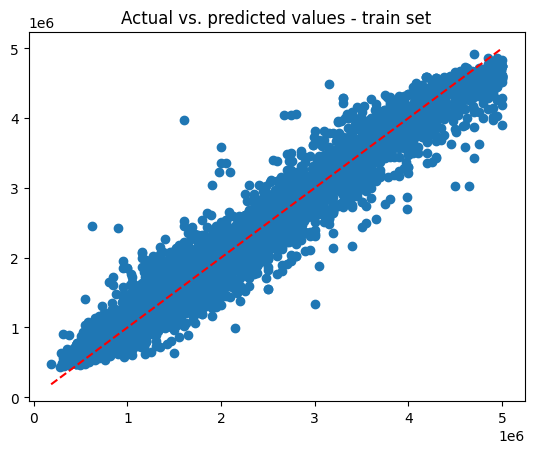

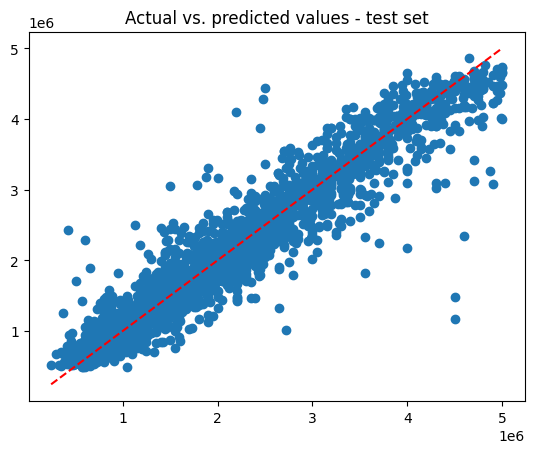

In [37]:
evaluation(pred_train=pred_train['prediction'], 
           train_y = pred_train['y_true'], 
           pred_test = pred_test['prediction'], 
           test_y = pred_test['y_true'])

In [20]:
model_2.importance_calculation()
model_2.importance

Age                          3387.0
KM's_driven                  2730.0
Transmission_Manual          1325.0
registration_city_encoded     649.0
Power_Mirrors                 577.0
Power_Steering                562.0
Power_Windows                 482.0
Alloy_Rims                    482.0
Air_Conditioning              298.0
Name: importance, dtype: float64

The quality of the second model is similar. Because of lower number of feature this one should be used.

## Linear regression benchmark

In [21]:
lr = LinearRegression().fit(train_X[model_2.final_models_feature],train_y)

In [22]:
pred_lr_train = lr.predict(train_X[model_2.final_models_feature])
pred_lr_test = lr.predict(test_X[model_2.final_models_feature])

  dataset        r2            mae      mape           rmse
0   train  0.643081  553758.569697   0.32182   694915.90891
1    test  0.649506  534344.397919  0.319574  676342.855467


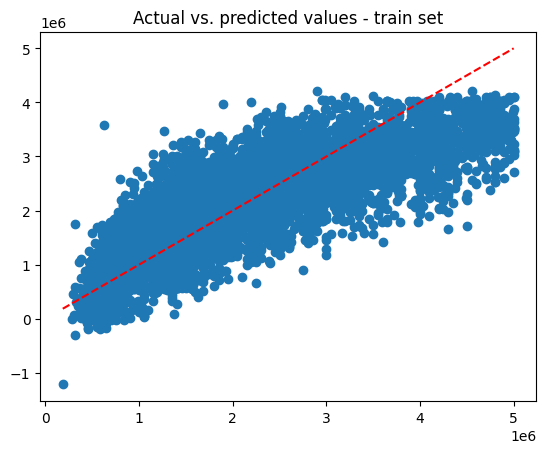

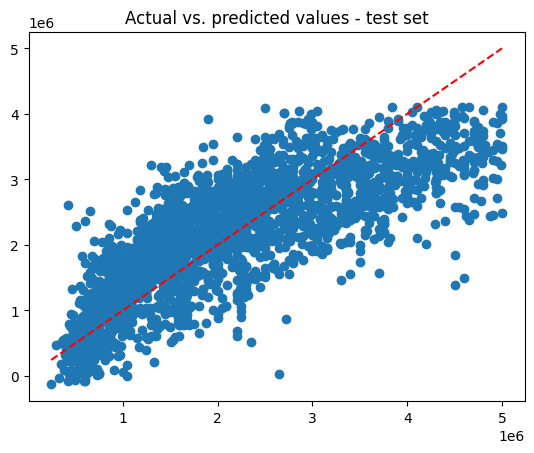

In [23]:
evaluation(pred_train=pred_lr_train, 
           train_y = pred_train['y_true'], 
           pred_test = pred_lr_test, 
           test_y = pred_test['y_true'])

Linear regression has lower accuracy and what is more important predicts prices below 0.

## Summary

1. Model with shorter list of variables will be deployed.
2. The chosen model has good quality and it is stable.
3. Next step is to deploy the model and create application which will reccomend advertisment's price.